In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(style='darkgrid')

In [2]:
#Data from Kaggle

df = pd.read_csv('housing 2.csv')
df.dropna(inplace=True)

df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
df = df.drop('ocean_proximity', axis=1)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [4]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


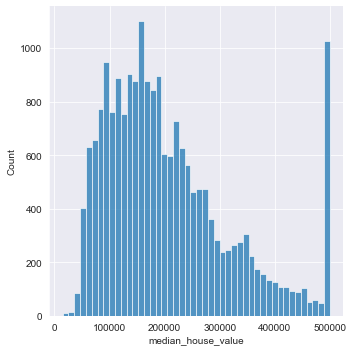

In [5]:
sns.displot(df['median_house_value'])

<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>

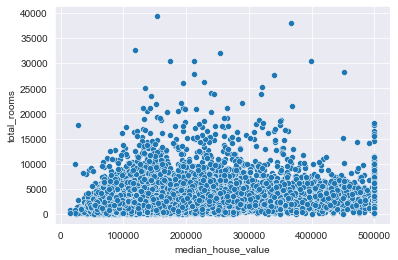

In [6]:
sns.scatterplot(x='median_house_value', y='total_rooms', data=df)

In [7]:
inputs = df.drop('median_house_value', axis=1)

output = df['median_house_value']
output.head()

0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: median_house_value, dtype: float64

In [8]:
#Partition the data for training

from sklearn.model_selection import train_test_split

inputs_train, inputs_test, output_train, output_test = train_test_split(inputs, output, test_size=0.3, random_state=42)

In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

inputs_train_scaled = scaler.fit_transform(inputs_train)
inputs_test_scaled = scaler.transform(inputs_test)

In [10]:
#from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential

from tensorflow.keras.callbacks import EarlyStopping

In [11]:
model = Sequential()

model.add(Dense(8, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(3, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

stop = EarlyStopping(monitor='val_loss', mode='min', verbose=True, patience=10)

In [12]:
model.fit(x=inputs_train_scaled, y=output_train.values, validation_data=(inputs_test_scaled, output_test.values), batch_size=128, epochs=300, callbacks=[stop], verbose=True)

Train on 14303 samples, validate on 6130 samples
Epoch 1/300
14303/14303 [==============================] - 2s 121us/sample - loss: 56288097594.7961 - val_loss: 55719608938.7432
Epoch 2/300
14303/14303 [==============================] - 1s 38us/sample - loss: 56287789062.3002 - val_loss: 55719093727.4258
Epoch 3/300
14303/14303 [==============================] - 1s 38us/sample - loss: 56286998297.4693 - val_loss: 55718021898.4405
Epoch 4/300
14303/14303 [==============================] - 1s 40us/sample - loss: 56285629316.2151 - val_loss: 55716215698.7511
Epoch 5/300
14303/14303 [==============================] - 1s 38us/sample - loss: 56283458414.1643 - val_loss: 55713486048.1775
Epoch 6/300
14303/14303 [==============================] - 1s 38us/sample - loss: 56279966148.4701 - val_loss: 55709516452.2075
Epoch 7/300
14303/14303 [==============================] - 1s 38us/sample - loss: 56275113565.7515 - val_loss: 55704199464.6760
Epoch 8/300
14303/14303 [=============================

14303/14303 [==============================] - 1s 36us/sample - loss: 45684990150.1705 - val_loss: 44297232146.1246
Epoch 65/300
14303/14303 [==============================] - 0s 34us/sample - loss: 45377628082.2496 - val_loss: 43899846460.8887
Epoch 66/300
14303/14303 [==============================] - 0s 34us/sample - loss: 44864941756.1116 - val_loss: 43489998725.7214
Epoch 67/300
14303/14303 [==============================] - 0s 34us/sample - loss: 44573470724.5820 - val_loss: 43079737369.3912
Epoch 68/300
14303/14303 [==============================] - 0s 34us/sample - loss: 44145221516.5915 - val_loss: 42660817309.6091
Epoch 69/300
14303/14303 [==============================] - 1s 35us/sample - loss: 44026958359.2320 - val_loss: 42244984608.8248
Epoch 70/300
14303/14303 [==============================] - 0s 34us/sample - loss: 43466557159.2108 - val_loss: 41818757350.5253
Epoch 71/300
14303/14303 [==============================] - 1s 37us/sample - loss: 43214420217.8609 - val_loss

14303/14303 [==============================] - 1s 49us/sample - loss: 31751267547.4337 - val_loss: 21386164010.1794
Epoch 128/300
14303/14303 [==============================] - 1s 45us/sample - loss: 31989111009.9487 - val_loss: 21304450336.9918
Epoch 129/300
14303/14303 [==============================] - 1s 38us/sample - loss: 32090382023.8529 - val_loss: 21240047103.4989
Epoch 130/300
14303/14303 [==============================] - 1s 65us/sample - loss: 32037669092.5260 - val_loss: 21163369811.1060
Epoch 131/300
14303/14303 [==============================] - 1s 46us/sample - loss: 31188632040.5532 - val_loss: 21080618908.4398
Epoch 132/300
14303/14303 [==============================] - 1s 40us/sample - loss: 31910767449.9750 - val_loss: 21024341353.1563
Epoch 133/300
14303/14303 [==============================] - 1s 42us/sample - loss: 31704053573.4277 - val_loss: 20939080591.4101
Epoch 134/300
14303/14303 [==============================] - 1s 37us/sample - loss: 31826485239.4088 - v

14303/14303 [==============================] - 0s 34us/sample - loss: 31394775880.2198 - val_loss: 20194977824.7413
Epoch 191/300
14303/14303 [==============================] - 0s 34us/sample - loss: 31324993265.8066 - val_loss: 20156448099.8108
Epoch 192/300
14303/14303 [==============================] - 0s 34us/sample - loss: 31135932017.3681 - val_loss: 20118745174.1964
Epoch 193/300
14303/14303 [==============================] - 1s 36us/sample - loss: 31444523051.3856 - val_loss: 20110483278.2617
Epoch 194/300
14303/14303 [==============================] - 1s 35us/sample - loss: 31904869324.3812 - val_loss: 20141041633.9315
Epoch 195/300
14303/14303 [==============================] - 0s 34us/sample - loss: 31167241147.4851 - val_loss: 20176059487.8852
Epoch 196/300
14303/14303 [==============================] - 1s 37us/sample - loss: 31493892540.5948 - val_loss: 20176529804.2362
Epoch 197/300
14303/14303 [==============================] - 0s 34us/sample - loss: 31481884536.1158 - v

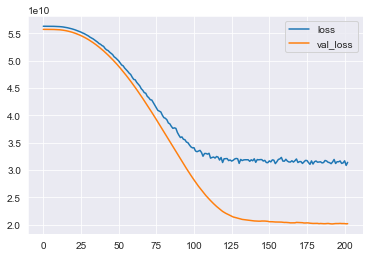

In [13]:
losses = pd.DataFrame(model.history.history)
losses.plot()
plt.show()

In [14]:
predictions = model.predict(inputs_test_scaled)

# for i in range(predictions.size):
#     print(predictions[i])
#     print("vs")
#     print(output_test.values[i])
#     print("\n")
    
#Not looking too good


In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print("Avg Absolute Error: ", mean_absolute_error(output_test, predictions))

print("Avg Squared Error: ", np.sqrt(mean_squared_error(output_test, predictions)))

Avg Absolute Error:  102798.77618398247
Avg Squared Error:  141965.87435513784
